# Data Preprocessing

The goal of this lab is to introduce you to data preprocessing techniques in order to make your data suitable for applying a learning algorithm.

## 1. Handling Missing Values

A common (and very unfortunate) data property is the ocurrence of missing and erroneous values in multiple features in datasets. For this exercise we will be using a data set about abalone snails.
The data set is contained in the Zip file you downloaded from Moodle.

To determine the age of a abalone snail you have to kill the snail and count the annual
rings. You are told to estimate the age of a snail on the basis of the following attributes:
1. type: male (0), female (1) and infant (2)
2. length in mm
3. width in mm
4. height in mm
5. total weight in grams
6. weight of the meat in grams
7. drained weight in grams
8. weight of the shell in grams
9. number of annual rings (number of rings +1, 5 yields age)

However, the data is incomplete. Missing values are marked with −1.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# load data 
df = pd.read_csv("http://www.cs.uni-potsdam.de/ml/teaching/ss15/ida/uebung02/abalone.csv")
df.columns=['type','length','width','height','total_weight','meat_weight','drained_weight','shell_weight','num_rings']
df.head()

,type,length,width,height,total_weight,meat_weight,drained_weight,shell_weight,num_rings
0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,-1
1,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,2,-1.000,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


### Exercise 1.1

Compute the mean of of each numeric column and the counts of each categorical column, excluding the missing values.

In [2]:
##################
#INSERT CODE HERE#
##################
cat_col = ['type']
num_col = list(set(df.columns)^set(cat_col)) # ^ operation remove common elements in set B from set A

print('Count for Categorical Columns\n',df[df[df.columns]!=-1].count()[cat_col])
print('\n')
print('Mean of Numeric Columns\n',df[df[df.columns]!=-1].mean()[num_col])


Count for Categorical Columns
 type    4089
dtype: int64


Mean of Numeric Columns
 meat_weight       0.359263
width             0.407955
height            0.139610
length            0.523692
total_weight      0.828843
shell_weight      0.238604
num_rings         9.921756
drained_weight    0.180249
dtype: float64


### Exercise 1.2

Compute the median of each numeric column,  excluding the missing values.

In [80]:
##################
#INSERT CODE HERE#
##################
print('Median of numerical columns\n\n',df[df[df.columns]!=-1].median()[num_col])

Median of numerical columns

 drained_weight    0.17050
total_weight      0.80175
shell_weight      0.23350
length            0.54500
height            0.14000
meat_weight       0.33600
num_rings         9.00000
width             0.42500
dtype: float64


### Exercise 1.3

Handle the missing values in a way that you find suitable. Argue your choices.

In [81]:
##################
#INSERT CODE HERE#
##################

miss_count = { col : df.loc[df[col] == -1,col].count() for col in df.columns }
miss_count

{'type': 87,
 'length': 124,
 'width': 124,
 'height': 124,
 'total_weight': 106,
 'meat_weight': 125,
 'drained_weight': 109,
 'shell_weight': 102,
 'num_rings': 99}

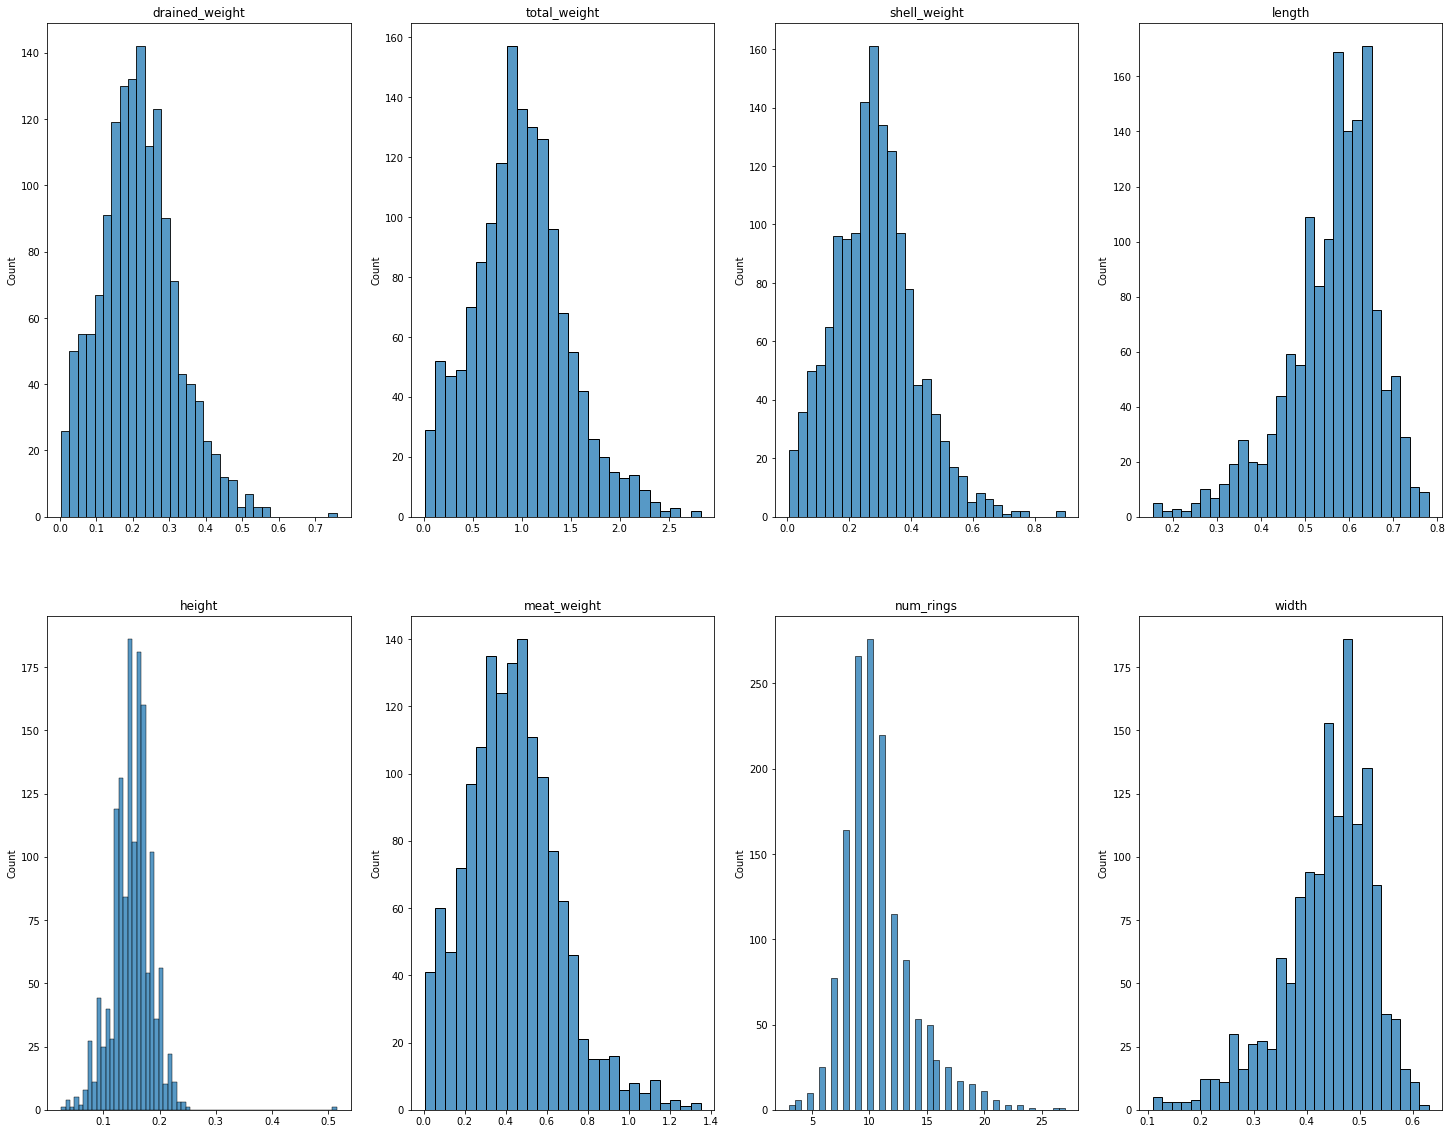

In [115]:
#df['age'] = df[df['num_rings']!=-1]['num_rings'] + 1.5
#sns.histplot(df[df['height']!=-1]['height'])

#Plot for Male 
f, axes = plt.subplots(2,4,figsize=(25, 20))
new_d = df[df['type']==0][num_col]
for i,col in enumerate(new_d.columns):
        x = int(i/4)
        y = int(i%4)
        axes[x,y].title.set_text(col)
        #sns.histplot(data = new_d, x = col,bins = 10, ax = axes[x,y]).set(xlabel=None)
        sns.histplot(new_d[new_d[col]!=-1][col], ax = axes[x,y]).set(xlabel=None)

In [182]:
for col in num_col:
    if col != 'height':
        df.loc[(df['type']==0) & (df[col] == -1),col] = df.loc[ (df['type']==0) & (df[col] != -1) ,col].mean()
df.loc[(df['type']==0) & (df['height'] == -1),'height'] = df.loc[ (df['type']==0) & (df['height'] != -1) ,'height'].median()

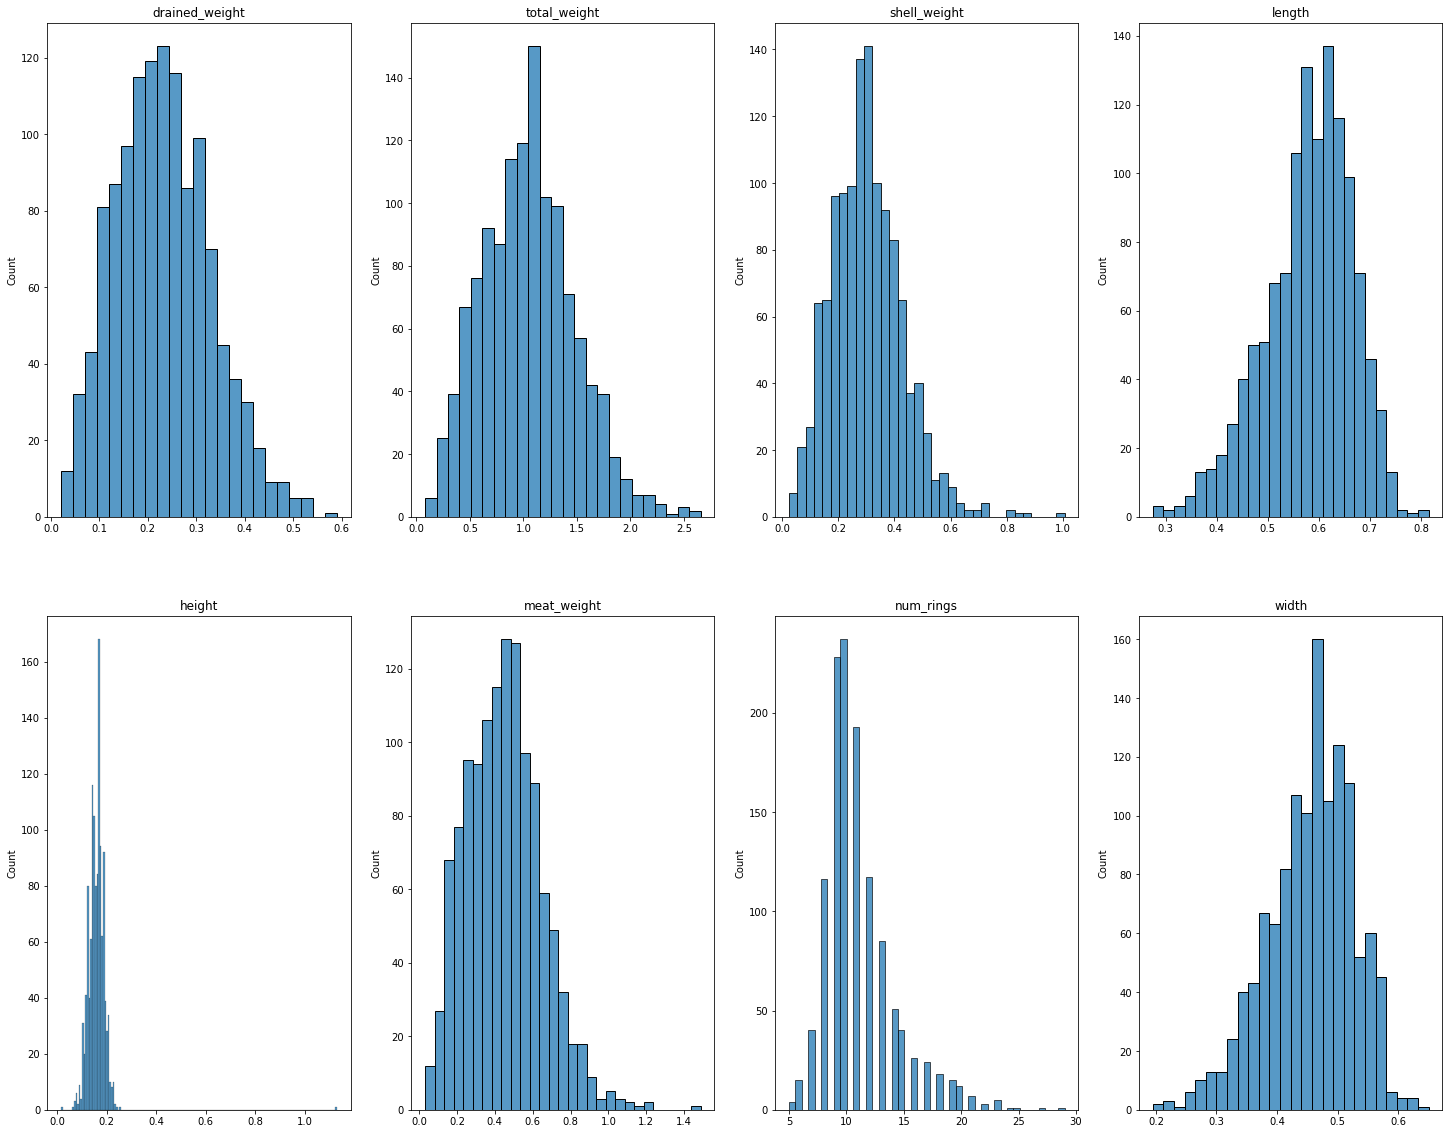

In [110]:
#Plot for Female
f, axes = plt.subplots(2,4,figsize=(25, 20))
new_d = df[df['type']==1][num_col]
for i,col in enumerate(new_d.columns):
        x = int(i/4)
        y = int(i%4)
        axes[x,y].title.set_text(col)
        #sns.histplot(data = new_d, x = col,bins = 10, ax = axes[x,y]).set(xlabel=None)
        sns.histplot(new_d[new_d[col]!=-1][col], ax = axes[x,y]).set(xlabel=None)

In [183]:
for col in num_col:
    if col != 'height':
        df.loc[(df['type']==1) & (df[col] == -1),col] = df.loc[ (df['type']==1) & (df[col] != -1) ,col].mean()
df.loc[(df['type']==1) & (df['height'] == -1),'height'] = df.loc[ (df['type']==1) & (df['height'] != -1) ,'height'].median()

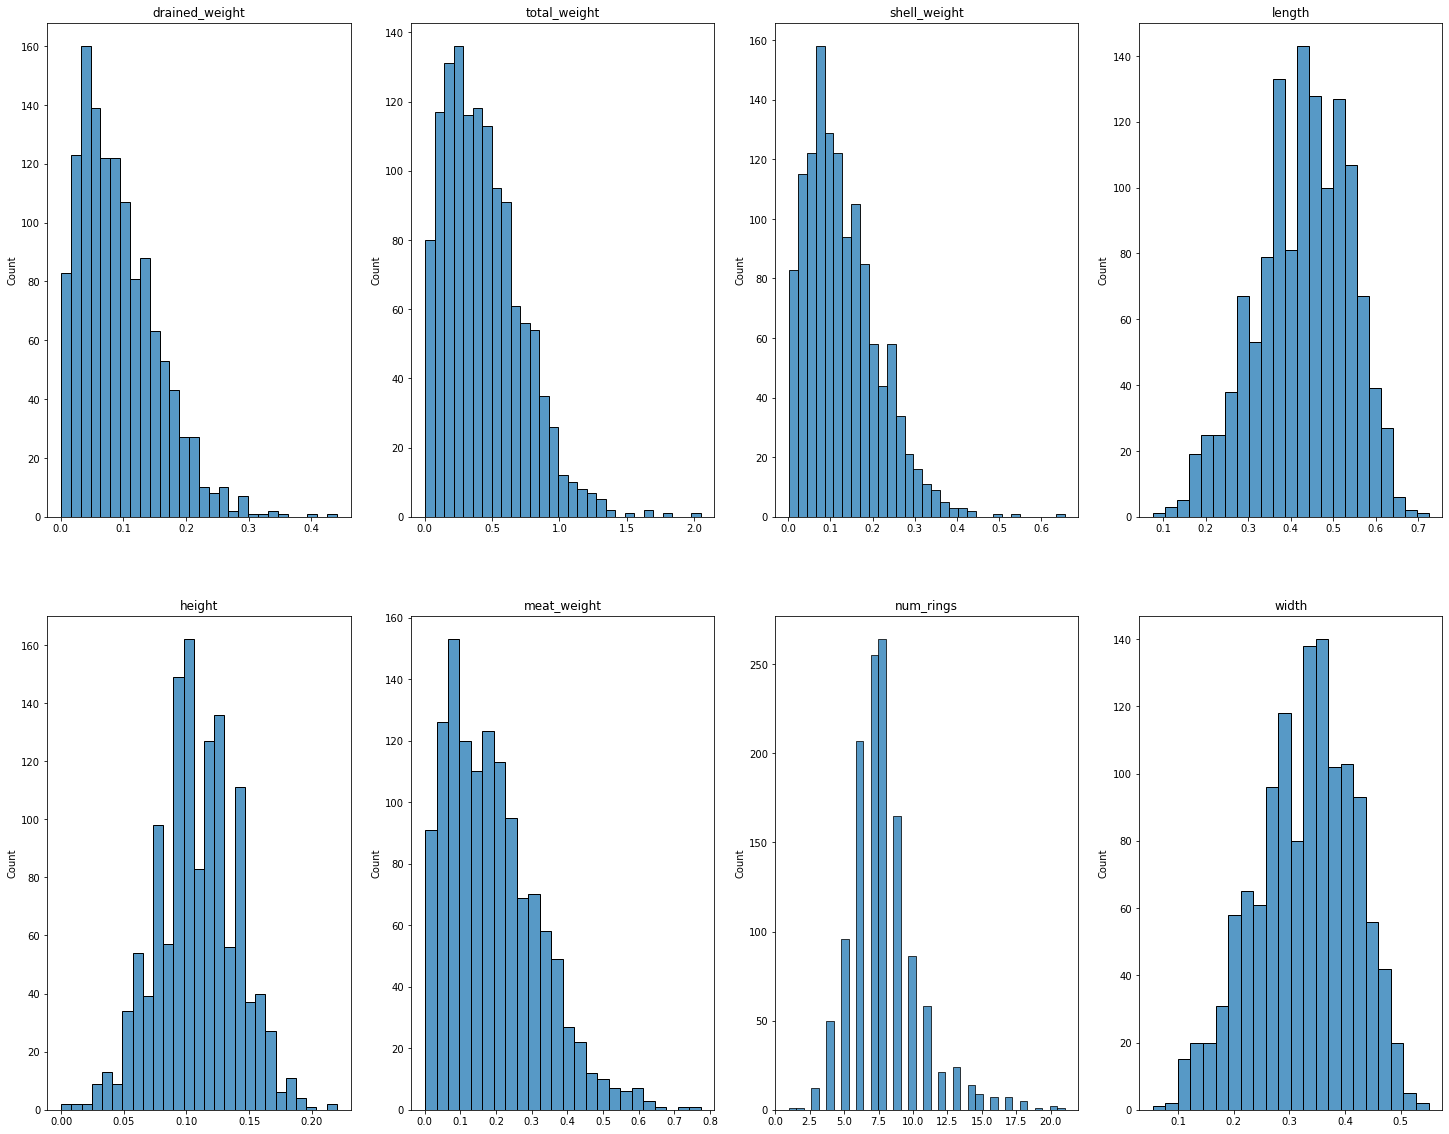

In [112]:
#Plot for Infant
f, axes = plt.subplots(2,4,figsize=(25, 20))
new_d = df[df['type']==2][num_col]
for i,col in enumerate(new_d.columns):
        x = int(i/4)
        y = int(i%4)
        axes[x,y].title.set_text(col)
        #sns.histplot(data = new_d, x = col,bins = 10, ax = axes[x,y]).set(xlabel=None)
        sns.histplot(new_d[new_d[col]!=-1][col], ax = axes[x,y]).set(xlabel=None)

In [184]:
for col in num_col:
    df.loc[(df['type']==2) & (df[col] == -1),col] = df.loc[ (df['type']==2) & (df[col] != -1) ,col].mean()

In [185]:
stats = df.loc[df['type'] != -1,:]
stats.groupby('type').mean()

,length,width,height,total_weight,meat_weight,drained_weight,shell_weight,num_rings
type,,,,,,,,
0,0.561227,0.439067,0.151760,0.991578,0.433480,0.215356,0.281789,10.724915
1,0.579720,0.454980,0.158190,1.047926,0.447967,0.230584,0.302170,11.122581
2,0.427849,0.326735,0.108092,0.434022,0.190852,0.092272,0.128545,7.882582


In [186]:
df.loc[ (df['type'] == -1) & (df['num_rings'] <= 8),'type'] = 2

In [187]:
df.drop(df[df['type'] == -1].index, inplace = True)

### Exercise 1.4

Perform Z-score normalization on every column (except the type of course!)

In [188]:
##################
#INSERT CODE HERE#
##################
from scipy.stats import zscore
df_n = df
for col in num_col:
    new_col = 'norm_'+str(col)
    df_n[col] = zscore(df_n[col])
    df_n.rename(columns = {col:new_col},inplace = True)
df

,type,norm_length,norm_width,norm_height,norm_total_weight,norm_meat_weight,norm_drained_weight,norm_shell_weight,norm_num_rings
0,0,-1.455152,-1.446146,-1.012261,-1.235775,-1.176882,-1.174976,-1.177530,0.255402
1,1,0.054951,0.128052,-0.082200,-0.307685,-0.464319,-0.340224,-0.191464,-0.283288
2,0,-0.700101,-0.430534,-0.288880,-0.638632,-0.650402,-0.587059,-0.578848,0.029012
3,2,-0.802043,-1.547708,-1.218942,-1.277915,-1.222268,-1.255758,-1.283180,-0.907887
4,2,-0.825942,-1.090682,-0.908921,-0.976773,-0.988529,-0.914677,-0.825364,-0.595587
...,...,...,...,...,...,...,...,...,...
4171,1,0.348581,0.432736,0.537841,0.123985,0.050814,0.534920,0.083225,0.341311
4172,0,0.558318,0.331174,-0.082200,0.286376,0.363978,0.315012,0.164224,0.029012
4173,0,0.642212,0.686639,1.364563,0.718046,0.756569,0.970248,0.498782,-0.283288
4174,1,0.851949,0.788200,0.227821,0.454780,0.781531,0.732388,0.414262,0.029012


## 2. Preprocessing text (Optional)

One possible way to transform text documents into vectors of numeric attributes is to use the TF-IDF representation. We will experiment with this representation using the 20 Newsgroup data set. The data set contains postings on 20 different topics. The classification problem is to decide which of the topics a posting falls into. Here, we will only consider postings about medicine and space.

In [189]:
from sklearn.datasets import fetch_20newsgroups


categories = ['sci.med', 'sci.space']
raw_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
print(f'The index of each category is: {[(i,target) for i,target in enumerate(raw_data.target_names)]}')


The index of each category is: [(0, 'sci.med'), (1, 'sci.space')]


In [209]:
raw_data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [215]:
raw_data.target_names[0]

'sci.med'

Check out some of the postings, might find some funny ones!

In [221]:
import numpy as np
idx = np.random.randint(0, len(raw_data.data))
print (f'This is a {raw_data.target_names[raw_data.target[idx]]} email.\n')
print (f'There are {len(raw_data.data)} emails.\n')
print(raw_data.data[idx])

This is a sci.space email.

There are 1187 emails.

From: dennisn@ecs.comm.mot.com (Dennis Newkirk)
Subject: Re: Proton/Centaur?
Organization: Motorola
Nntp-Posting-Host: 145.1.146.43
Lines: 31

In article <1r54to$oh@access.digex.net> prb@access.digex.com (Pat) writes:
>The question i have about the proton, is  could it be  handled at
>one of KSC's spare pads, without major  malfunction,  or could it be
>handled at kourou  or Vandenberg?   

Seems like a lot of trouble to go to. Its probably better to   
invest in newer launch systems. I don't think a big cost advantage
for using Russian systems will last for very long (maybe a few years). 
Lockheed would be the place to ask, since you would probably have to buy 
the Proton from them (they market the Proton world wide except Russia). 
They should know a lot about the possibilities, I haven't heard them
propose US launches, so I assume they looked into it and found it 
unprofitable. 

>Now if it uses storables,  

Yes...

>then  how lon

Lets pick the first 10 postings from each category

In [191]:
idxs_med = np.flatnonzero(raw_data.target == 0) # returns index with category med
idxs_space = np.flatnonzero(raw_data.target == 1) # return index with category space
idxs = np.concatenate([idxs_med[:10],idxs_space[:10]])
data = np.array(raw_data.data)
data = data[idxs]

In [225]:
data[19]

'From: mccall@mksol.dseg.ti.com (fred j mccall 575-3539)\nSubject: Re: PLANETS STILL: IMAGES ORBIT BY ETHER TWIST\nArticle-I.D.: mksol.1993Apr22.213815.12288\nOrganization: Texas Instruments Inc\nLines: 22\n\nIn <1993Apr22.130923.115397@zeus.calpoly.edu> dmcaloon@tuba.calpoly.edu (David McAloon) writes:\n\n> ETHER IMPLODES 2 EARTH CORE, IS GRAVITY!!!\n\nIf not for the lack of extraneously capitalized words, I\'d swear that\nMcElwaine had changed his name and moved to Cal Poly.  I also find the\nchoice of newsgroups \'interesting\'.  Perhaps someone should tell this\nguy that \'sci.astro\' doesn\'t stand for \'astrology\'?\n\nIt\'s truly frightening that posts like this are originating at what\nare ostensibly centers of higher learning in this country.  Small\nwonder that the rest of the world thinks we\'re all nuts and that we\nhave the problems that we do.\n\n[In case you haven\'t gotten it yet, David, I don\'t think this was\nquite appropriate for a posting to \'sci\' groups.]\n\n-- 

<a href="http://www.nltk.org/">NLTK</a> is a toolkit for natural language processing. Take some time to install it and go through this <a href="http://www.slideshare.net/japerk/nltk-in-20-minutes">short tutorial/presentation</a>.

The downloaded package below is a tokenizer that divides a text into a list of sentences, by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.

In [192]:
import nltk
import itertools
nltk.download('punkt')

# Tokenize the sentences into words
tokenized_sentences = [nltk.word_tokenize(sent) for sent in data]
vocabulary_size = 1000
unknown_token = 'unknown'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\COG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [229]:
tokenized_sentences[0][:10]

['From',
 ':',
 'geb',
 '@',
 'cs.pitt.edu',
 '(',
 'Gordon',
 'Banks',
 ')',
 'Subject']

In [193]:
# Count the word frequencies
word_freq = nltk.FreqDist(itertools.chain(*tokenized_sentences))
print (f"Found {len(word_freq.items())} unique words tokens.")

Found 1636 unique words tokens.


In [236]:
word_freq.keys()

dict_keys(['From', ':', 'geb', '@', 'cs.pitt.edu', '(', 'Gordon', 'Banks', ')', 'Subject', 'Re', 'Striato', 'Nigral', 'Degeneration', 'Reply-To', 'Organization', 'Univ', '.', 'of', 'Pittsburgh', 'Computer', 'Science', 'Lines', '16', 'In', 'article', '<', '9303252134.AA09923', 'walrus.mvhs.edu', '>', 'ktodd', 'Ken', 'Todd', 'writes', 'I', 'would', 'like', 'any', 'information', 'available', 'on', 'this', 'rare', 'disease', 'understand', 'that', 'an', 'operation', 'referred', 'to', 'as', 'POLLIDOTOMY', 'may', 'be', 'in', 'order', 'Does', 'anyone', 'know', 'a', 'physician', 'performs', 'procedure', 'All', 'responses', 'will', 'appreciated', 'Please', 'respond', 'via', 'email', 'It', 'is', "n't", ',', 'actually', 'Many', 'cases', 'are', 'called', "Parkinson's", 'Disease', 'turn', 'out', 'autopsy', 'SND', 'should', 'suspected', 'case', 'Parkinsonism', 'without', 'tremor', 'and', 'which', 'does', 'not', 'L-dopa', 'therapy', 'do', 'believe', 'pallidotomy', 'much', 'for', '--', 'N3JXP', '|', '`

In [194]:
# Get the most common words and build index_to_word and word_to_index vectors
vocab = word_freq.most_common(vocabulary_size-1)
index_to_word = [x[0] for x in vocab]
index_to_word.append(unknown_token)
word_to_index = dict([(w,i) for i,w in enumerate(index_to_word)])
 
print (f"Using vocabulary size {vocabulary_size}." )
print (f"The least frequent word in our vocabulary is '{vocab[-1][0]}' and appeared {vocab[-1][1]} times.")

Using vocabulary size 1000.
The least frequent word in our vocabulary is 'AN' and appeared 1 times.


In [246]:
word_to_index

{':': 0,
 '.': 1,
 ',': 2,
 '--': 3,
 '>': 4,
 'the': 5,
 ')': 6,
 'to': 7,
 '(': 8,
 'of': 9,
 '@': 10,
 'a': 11,
 'and': 12,
 'I': 13,
 'that': 14,
 'is': 15,
 'in': 16,
 'it': 17,
 'be': 18,
 '?': 19,
 'for': 20,
 '!': 21,
 'this': 22,
 "n't": 23,
 '*': 24,
 'are': 25,
 "'s": 26,
 'From': 27,
 'do': 28,
 'Subject': 29,
 'Organization': 30,
 'Lines': 31,
 "''": 32,
 'on': 33,
 'have': 34,
 'as': 35,
 'not': 36,
 '``': 37,
 'you': 38,
 'In': 39,
 'an': 40,
 'was': 41,
 'we': 42,
 'Re': 43,
 'The': 44,
 '-': 45,
 '<': 46,
 'would': 47,
 'if': 48,
 'o': 49,
 'writes': 50,
 'will': 51,
 'It': 52,
 'but': 53,
 'or': 54,
 'they': 55,
 'Space': 56,
 'article': 57,
 'may': 58,
 'with': 59,
 'food': 60,
 'by': 61,
 'what': 62,
 '...': 63,
 'see': 64,
 'like': 65,
 'should': 66,
 'can': 67,
 'there': 68,
 'some': 69,
 'about': 70,
 'at': 71,
 'know': 72,
 'up': 73,
 'who': 74,
 '..': 75,
 'Griffin': 76,
 'out': 77,
 'which': 78,
 'Is': 79,
 'diet': 80,
 'one': 81,
 'inflammation': 82,
 'used':

### Exercise 2.1

Code your own TF-IDF representation function and use it on this dataset. (Don't use code from libraries. Build your own function with Numpy/Pandas). Use the formular TFIDF = TF * (IDF+1). The effect of adding “1” to the idf in the equation above is that terms with zero idf, i.e., terms that occur in all documents in a training set, will not be entirely ignored. The term frequency is the raw count of a term in a document. The inverse document frequency is the natural logarithm of the inverse fraction of the documents that contain the word.

In [321]:
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer()
df = pd.DataFrame(countvec.fit_transform(data).toarray(), columns=countvec.get_feature_names())

def tfidf(df):
    
    ##################
    #INSERT CODE HERE#
    ##################
    idf = np.tile(np.log(20/df.astype(bool).sum(axis=0))+1,(20,1))
    tf = np.array(df)
    tf_idf = np.multiply(tf,idf)
    return tf_idf
    
rep = tfidf(df)

# Check if your implementation is correct
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(norm=None, smooth_idf=False, use_idf=True)
X_train = pd.DataFrame(vectorizer.fit_transform(data).toarray(), columns=countvec.get_feature_names())
answer=['No','Yes']
epsilon = 0.0001
if rep is not None:
    print (f'Is this implementation correct?\nAnswer: {answer[1*np.all((X_train - rep) < epsilon)]}')

Is this implementation correct?
Answer: Yes


In [252]:
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer()
df = pd.DataFrame(countvec.fit_transform(data).toarray(), columns=countvec.get_feature_names())

In [279]:
df

,02,041300,07,0815,10,101,10511,11,115397,12,...,yellow,yeltsin,yet,you,young,younger,your,z3,zeta,zeus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,2,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,3,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [278]:
X_train

,02,041300,07,0815,10,101,10511,11,115397,12,...,yellow,yeltsin,yet,you,young,younger,your,z3,zeta,zeus
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.995732,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.302585,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.302585,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,8.992538,0.000000,0.000000,7.991465,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,3.995732,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.798508,3.302585,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.987197,0.000000,0.000000,1.798508,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [320]:
rep = np.zeros(df.shape)
df.loc[df['yellow']!=0,'yellow'].count()
a = np.tile(np.log(20/df.astype(bool).sum(axis=0))+1,(20,1))
b = np.array(df)
#c = np.tile(a,(20,1))
X = pd.DataFrame(np.multiply(a,b), columns=countvec.get_feature_names())
X


,02,041300,07,0815,10,101,10511,11,115397,12,...,yellow,yeltsin,yet,you,young,younger,your,z3,zeta,zeus
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.995732,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.302585,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.302585,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,8.992538,0.000000,0.000000,7.991465,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,3.995732,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.798508,3.302585,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.987197,0.000000,0.000000,1.798508,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
